## Multiple Linear Regression
### Purpose
The purpose of this notebook is to evaluate the relation between fuel consumption and Carbon dioxide emission of cars. 

### Steps for Completion
1.) The data will be split into training and test sets

2.) Create a model using the training set

3.) Evaluate model using the test set

4.) Use model to predict unknown value

## About the Data
The dataset used for this project (FuelConsumption.csv) contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Source here](open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

To download the data, open your terminal and type:

```wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv```

Data columns:
- **MODELYEAR**
- **MAKE**
- **MODEL**
- **VEHICLE CLASS**
- **ENGINE SIZE**
- **CYLINDERS**
- **TRANSMISSION**
- **FUELTYPE**
- **FUEL CONSUMPTION in CITY(L/100 km)**
- **FUEL CONSUMPTION in HWY (L/100 km)**
- **FUEL CONSUMPTION COMB (L/100 km)**
- **CO2 EMISSIONS (g/km)**

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [12]:
# retrieve data from csv
df = pd.read_csv("FuelConsumption.csv")
df.columns = map(str.lower, df.columns) # change cols to lwercase
df.head()

,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
# get a summarization of the data
df.describe()

,modelyear,enginesize,cylinders,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [14]:
# select features wanted for regression
cdf = df[["enginesize", 'cylinders', 'fuelconsumption_city', 'fuelconsumption_hwy', 'fuelconsumption_comb', 'co2emissions']]
cdf.head(9)

,enginesize,cylinders,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,co2emissions
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


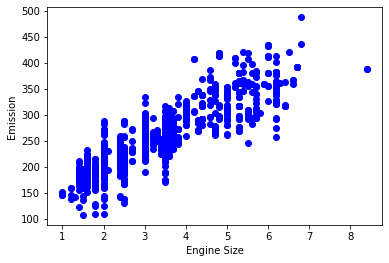

In [15]:
# plot emission values with respect to emission size
plt.scatter(cdf.enginesize, cdf.co2emissions, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

### Train & Test Data

In [16]:
# split data 80%/20% for training data/testing data
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk] # 80%
test = cdf[~msk] # 20%

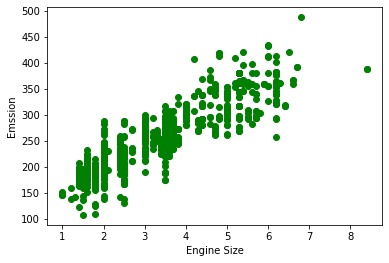

In [17]:
# Train data distribution
plt.scatter(train.enginesize, train.co2emissions, color="green")
plt.xlabel("Engine Size")
plt.ylabel("Emssion")
plt.show()

### Multiple Regression Model
There are multiple variables that predict the CO2 Emissions. Because there are more than one independent variables present, we will use multiple regression.

We will use the Ordinary Least Squares (OLS) method.

#### Ordinary Least Squares (OLS)
This method is used for estimating the unknown parameters in a linear regression model. 

It chooses the parameters of the linear function of a set of explanatory variable by minimizing the sum of squares of differents between the actual dependent vairable and those predicted by the function.

In [29]:
# sklearn uses Ordinary Least Squares method
from sklearn import linear_model

# with fuel_consumption_comb only
reg = linear_model.LinearRegression()
x = np.asanyarray(train[['enginesize', 'cylinders', 'fuelconsumption_comb']])
y = np.asanyarray(train[['co2emissions']])
reg.fit(x,y)

# Coefficients
print(f'Coefficients: {reg.coef_}')

Coefficients: [[10.79674038  7.67358958  9.32459031]]


In [30]:
# with fuel_consumption_city/hwy
reg2 = linear_model.LinearRegression()
a = np.asanyarray(train[['enginesize', 'cylinders', 'fuelconsumption_city', 'fuelconsumption_hwy']])
b = np.asanyarray(train[['co2emissions']])
reg2.fit(a,b)

# Coefficients
print(f'Coefficients: {reg2.coef_}')

Coefficients: [[10.83898779  7.50481023  5.57138872  3.60230447]]


### Prediction

In [31]:
# Prediction with fuel_comsumption_comb
y_hat = reg.predict(test[['enginesize', 'cylinders', 'fuelconsumption_comb']])
x = np.asanyarray(test[['enginesize', 'cylinders', 'fuelconsumption_comb']])
y = np.asanyarray(test[['co2emissions']])

print(f"Residual sum of squares: %.2f" % np.mean((y_hat - y) **2))

Residual sum of squares: 565.37


In [ ]:
# Prediction with fuel_comsumption_city/hwy
b_hat = reg2.predict(test[['enginesize', 'cylinders', 'fuelconsumption_city', 'fuelconsumption_hwy']])
a = np.asanyarray(test[['enginesize', 'cylinders', 'fuelconsumption_city', 'fuelconsumption_hwy']])
b = np.asanyarray(test[['co2emissions']])

print(f"Residual sum of squares: %.2f" % np.mean((b_hat - b) **2))

#### Explained Variance Regression Score
**$\hat{y}$** : the target (predicted) output.

**Y** is the corresponding (correct) target output.

**Var** Variance or Square of the standard deviation

Formula for Explained Variance:
$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$

__Note:__ Best possible score = 1.0

In [33]:
# explained variance score
print('Fuel Consumption Comb Variance score: %.2f' %reg.score(x,y))

print('Fuel Consumption City/HWY Variance score: %.2f' %reg2.score(a,b))

Fuel Consumption Comb Variance score: 0.88
Fuel Consumption City/HWY Variance score: 0.86


Notice that the result with fuel_consumption_comb is more accurate than fuel_consumption_city/hwy!

# END